In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 10525 (delta 60), reused 45 (delta 24), pack-reused 10409
Receiving objects: 100% (10525/10525), 261.98 MiB | 39.00 MiB/s, done.
Resolving deltas: 100% (4673/4673), done.
Checking out files: 100% (8428/8428), done.


In [3]:
! cd Monk_Object_Detection/13_tf_obj_2/installation && chmod +x install_colab.sh && ./install_colab.sh

Processing /content/Monk_Object_Detection/13_tf_obj_2/lib/models/research
     |████████████████████████████████| 8.7MB 14.9MB/s 
     |████████████████████████████████| 358kB 48.4MB/s 
     |████████████████████████████████| 716kB 51.7MB/s 
     |████████████████████████████████| 2.0MB 50.1MB/s 
     |████████████████████████████████| 829kB 57.5MB/s 
     |████████████████████████████████| 63.8MB 43kB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 61kB 11.6MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 153kB 53.4MB/s 
     |████████████████████████████████| 174kB 52.2MB/s 
     |████████████████████████████████| 102kB 17.1MB/s 
     |████████████████████████████████| 36.7MB 71kB/s 
     |████████████████████████████████| 1.1MB 59.9MB/s 
     |████████████████████████████████| 112kB 62.5MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1

In [62]:
import os
import sys
sys.path.append("Monk_Object_Detection/13_tf_obj_2/lib/")

In [63]:
from train_detector import Detector
gtf = Detector();

In [64]:
gtf.list_models();

1. Model Name: ssd_mobilenet_v2_320
2. Model Name: ssd_mobilenet_v1_fpn_640
3. Model Name: ssd_mobilenet_v2_fpnlite_320
4. Model Name: ssd_mobilenet_v2_fpnlite_640
5. Model Name: ssd_resnet50_v1_fpn_320
6. Model Name: ssd_resnet50_v1_fpn_640
7. Model Name: ssd_resnet101_v1_fpn_320
8. Model Name: ssd_resnet101_v1_fpn_640
9. Model Name: ssd_resnet152_v1_fpn_320
10. Model Name: ssd_resnet152_v1_fpn_640
11. Model Name: faster_rcnn_resnet50_v1_640
12. Model Name: faster_rcnn_resnet50_v1_1024
13. Model Name: faster_rcnn_resnet101_v1_640
14. Model Name: faster_rcnn_resnet101_v1_1024
15. Model Name: faster_rcnn_resnet152_v1_640
16. Model Name: faster_rcnn_resnet152_v1_1024
17. Model Name: faster_rcnn_inception_resnet_v2_640
18. Model Name: faster_rcnn_inception_resnet_v2_1024
19. Model Name: efficientdet_d0
20. Model Name: efficientdet_d1
21. Model Name: efficientdet_d2
22. Model Name: efficientdet_d3
23. Model Name: efficientdet_d4
24. Model Name: efficientdet_d5
25. Model Name: efficientdet_

In [66]:
train_img_dir = "/content/drive/MyDrive/Grindwell/train_new_img/";
train_anno_dir = "/content/drive/MyDrive/Grindwell/train_new_xml/";
class_list_file = "/content/drive/MyDrive/Grindwell/classes.txt";
val_img_dir = "/content/drive/MyDrive/Grindwell/test_new_img/";
val_anno_dir = "/content/drive/MyDrive/Grindwell/test_new_xml/";

In [67]:
gtf.set_train_dataset(train_img_dir, train_anno_dir, class_list_file, batch_size=8)
gtf.set_val_dataset(val_img_dir, val_anno_dir)

In [71]:
#gtf.create_tfrecord(data_output_dir="data_tfrecord")


gtf.create_tfrecord(data_output_dir="data_tfrecord")


gtf.set_model_params(model_name="ssd_mobilenet_v2_fpnlite_640")
gtf.set_hyper_params(num_train_steps=10000, lr=0.09)
gtf.export_params(output_directory="export_dir");
#gtf.TensorRT_Optimization_Params(conversion_type="INT8", trt_dir="trt_dir_int")

Training tfrecord already present at data_tfrecord/train.record.
Validation tfrecord already present at data_tfrecord/val.record.
Model Download
Model name set as ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8


In [72]:
!python /content/Monk_Object_Detection/13_tf_obj_2/lib/train.py

2020-12-10 12:46:39.641439: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-10 12:46:41.587229: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-10 12:46:41.591503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-10 12:46:41.591918: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-10 12:46:41.591952: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-10 12:46:41.593750: I tensorflow/stream_executor/platform/default

In [73]:
!python /content/Monk_Object_Detection/13_tf_obj_2/lib/export.py

2020-12-10 14:13:05.101972: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-10 14:13:07.984288: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-10 14:13:07.988782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-10 14:13:07.989211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-12-10 14:13:07.989248: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-10 14:13:07.994397: I tensorflow/stream_executor/platform/default

In [74]:
from infer_detector import Infer
gtf = Infer();

In [76]:
import time
s = time.time()
gtf.set_model_params(exported_model_dir = 'export_dir')
d = time.time()
print(d-s)

9.648123264312744


Image loading and preproc time - 0.5158007144927979
Inference time - 0.027996063232421875
Extracting results and priting on image time - 0.14224600791931152
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


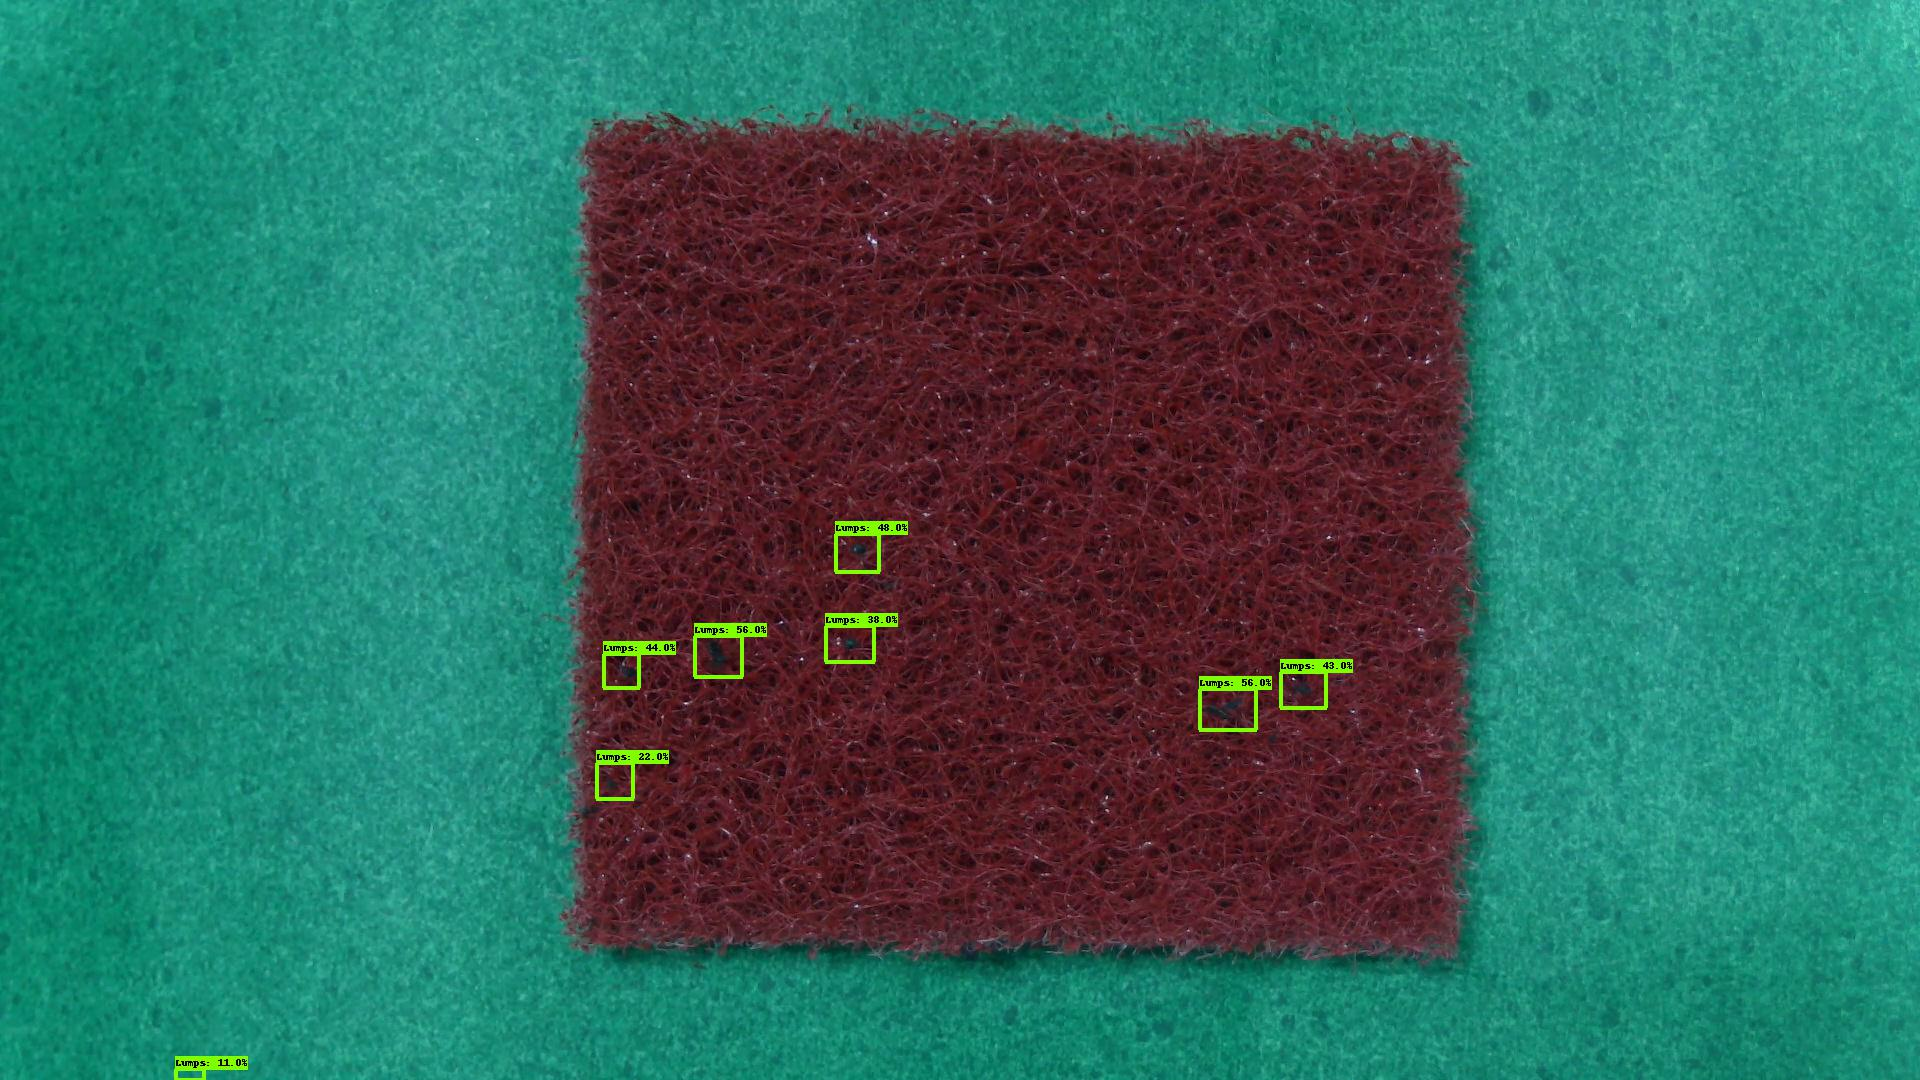

In [89]:
scores, bboxes, labels = gtf.infer_on_image('/content/drive/MyDrive/Grindwell/test_img/imag/434.jpg', thresh=0.1);
print(labels)



from IPython.display import Image
Image(filename='output.jpg') 

In [61]:
# implement tensorrt 
# from infer_detector import Infer
# gtf = Infer();
# gtf.set_model_params(exported_model_dir = 'trt_dir_int')
# ls /Grindwell/test_new_img
# scores, bboxes, labels = gtf.infer_on_image('/content/drive/MyDrive/Grindwell/test_new_img/106.jpg', thresh=0.1);
# from IPython.display import Image
# Image(filename='output.png') 


In [ ]:
import os

input_dir = ""
out_put = ""